In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('files/homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [5]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [10]:
# concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


## dummy variable trap
whenever one variable can be derived from the rest of the variables, these variables
are said to be multicollinear, then there is multicollinearity in the dataset that can
mess up the model.

To avoid this trap, we can drop any of the dummies variables, just one of them.

We will also drop the original categorical feature

In [12]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [15]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [16]:
model.fit(X, y)

LinearRegression()

In [17]:
model.predict([[2800, 0, 1]])  # price of a 2800 sqft apartment in robinsville

array([590775.63964739])

In [18]:
model.predict([[3400, 0, 0]])  # price of a 3400 sqft apartment in west windsor

array([681241.66845839])

In [19]:
# accuracy of the model
model.score(X, y)

0.9573929037221873

model is 95 % accurate

## using one hot encoding to do the same thing

In [21]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [23]:
dfle = df
dfle.town = le.fit_transform(dfle.town, )

In [24]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [26]:
X = dfle[['town', 'area']].values  # values because I want X to be a 2D array and not a dataframe
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [27]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [34]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [35]:
# removing one of the dummy variables
X = X[:,1:]  # takes every row and columns from index 1 onwards (removing first column at index 0)
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [36]:
model.fit(X, y)

LinearRegression()

In [37]:
model.predict([[1, 0, 2800]])  # predicting price of a 2800 sqft home in robinsville
# note: the double square brackets is because it is expecting a 2D array

array([590775.63964739])

In [38]:
model.predict([[0, 1, 3400]])  # predicting price of a 3400 sqft home in west windsor

array([681241.6684584])

# exercise

In [39]:
data = pd.read_csv('files/carprices.csv')
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [43]:
import matplotlib.pyplot as plt

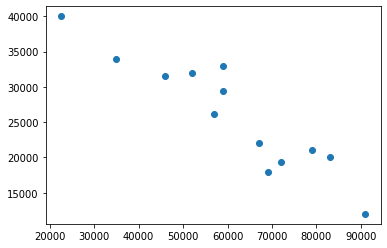

In [44]:
plt.scatter(data.Mileage, data['Sell Price($)'])

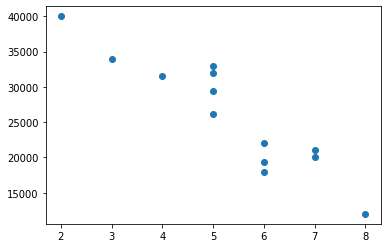

In [47]:
plt.scatter(data['Age(yrs)'], data['Sell Price($)'])

In [40]:
# need to encode the categorical variable "Car Model"

dummies = pd.get_dummies(data['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [48]:
merged = pd.concat([data, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [49]:
final = merged.drop(['Car Model', 'Audi A5'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [50]:
X = final.drop('Sell Price($)', axis=1)
y = final['Sell Price($)']

In [51]:
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [52]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [53]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [54]:
# predicting price of a Mercedez Benz which is 4 yrs old with 45000 mileage
lr.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [55]:
# predicting price of a BMW which is 7 yrs old with 86000 mileage
lr.predict([[86000, 7, 1, 0]])

array([11080.74313219])

In [56]:
# accuracy of the model
lr.score(X, y)

0.9417050937281082